In [ ]:
# Computação Gráfica

## P2 - Experimentos Básicos de Processamento de Imagens


### Nome do aluno: Otávio Cabral Leme
### RA: 740716
### email: otavio.740716@engenharia.fsa.br


ATIVIDADES

# **1)**
Elabore um programa que carrega a sua foto e separa (por tentativa e erro) uma ROI de seu rosto apenas (olhos, nariz, e boca). Insira esta ROI numa imagem do objeto capturada e salve a imagem resultante.


In [3]:
# Importando bibliotecas
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


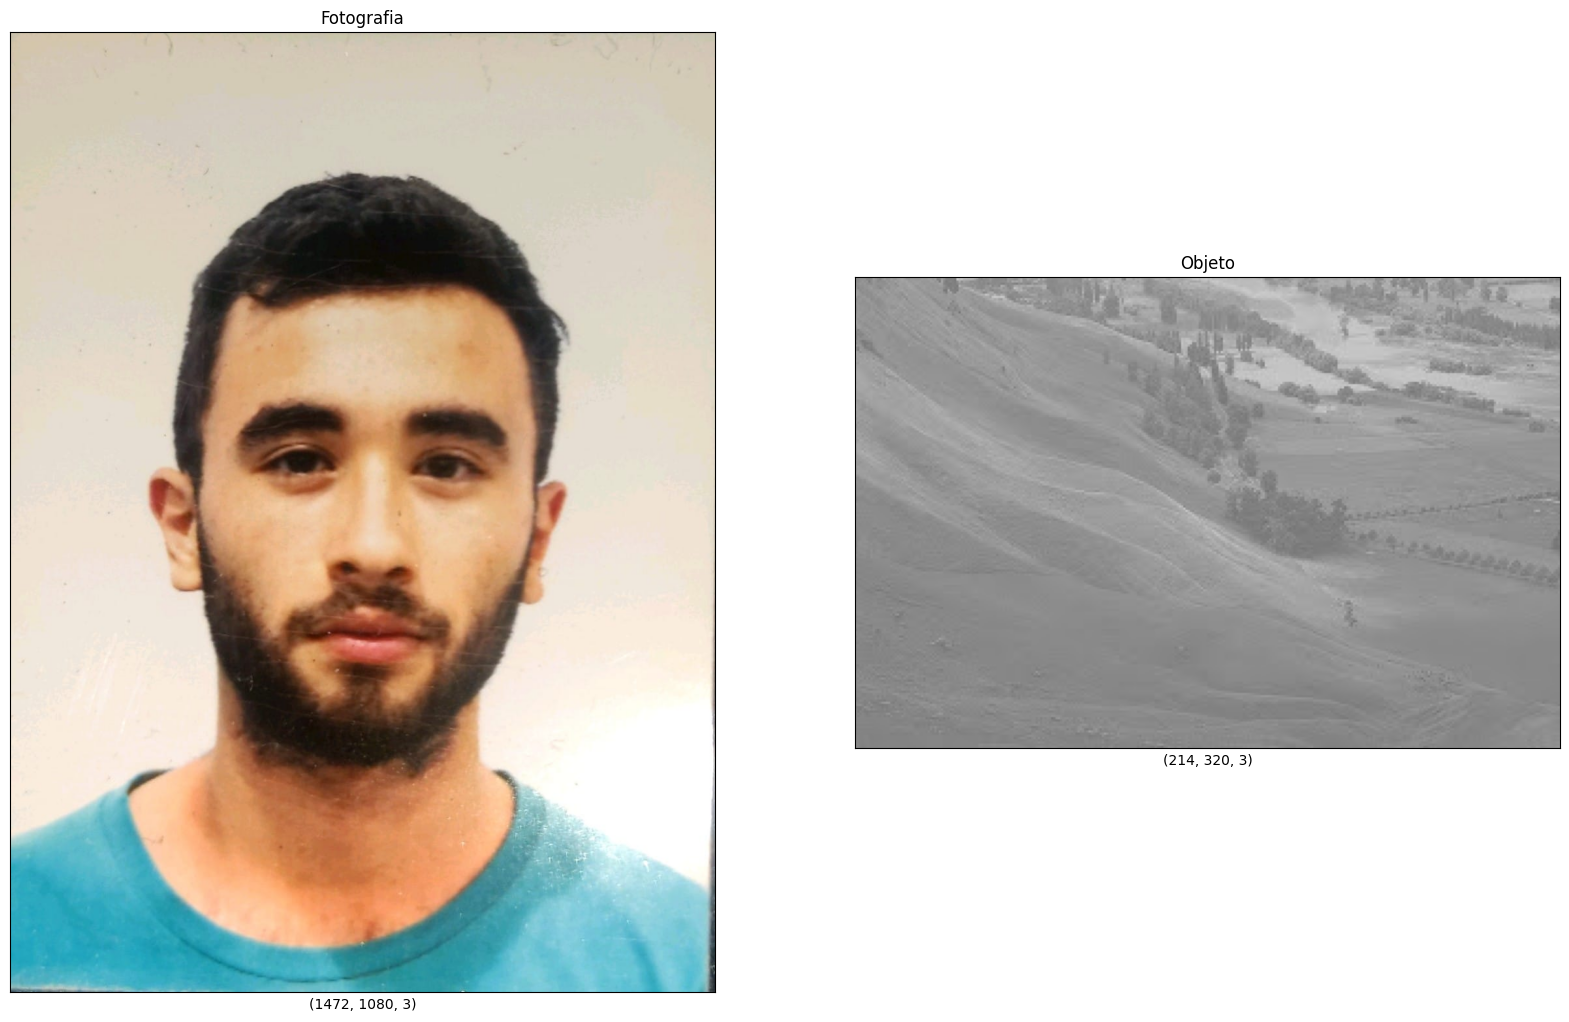

In [19]:
# Carregando as imagens
# Assuming images are in the 'Colab' folder within your Google Drive 'P2-COMPUTACAO-GRAFICA' folder
cap = cv2.imread('/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/3X4.jpeg')
obj = cv2.imread('/content/drive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/wiki.jpg')

# Check if images loaded successfully
if foto is None or fundo is None:
  print("Error: Could not load one or both images. Please check the file paths.")
else:
  # Subplots
  plt.figure(figsize = (20,20))
  plt.subplot(121) #Fotografia
  plt.imshow(cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)) # Changed 'cap' to 'foto'
  plt.title("Fotografia"),plt.xlabel(foto.shape),plt.xticks([]),plt.yticks([]) # Changed 'cap' to 'foto'
  plt.subplot(122) #Objeto
  plt.imshow(cv2.cvtColor(fundo, cv2.COLOR_BGR2RGB)) # Changed 'obj' to 'fundo'
  plt.title("Objeto"),plt.xlabel(fundo.shape),plt.xticks([]),plt.yticks([]) # Changed 'obj' to 'fundo'
  plt.show()

In [21]:
# # ROI
cap = cv2.imread('/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/3X4.jpeg')
obj = cv2.imread('/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/wiki.jpg')

olhos = cap[510:570, 820:1050]  #img [y1:y2, x1:x2]
obj[510:570, 820:1050] = olhos

nariz = cap[530:680, 890:1000]
obj[530:680, 890:1000] = nariz

boca = cap[700:750, 870:1020]
obj[700:750, 870:1020] = boca

cv2_imshow(obj)
cv2.imwrite("obj.jpg", obj)

ValueError: could not broadcast input array from shape (60,230,3) into shape (0,0,3)

# **2)**
Elabore um programa utilizando os comandos para executar as operações aritméticas e reproduzir as imagens conforme aula “Operações Aritméticas em Pixels”.
Imagens: cameraman.tif, toycars1.png, toycars2.png, toycars3.png, cola1.png, cola2.png

Como operadores aritméticos, entenda-se a operação básica de somar duas imagens, são utilizados os comandos cv2.add(), cv2.subtract(), cv2.addWeighted() e soma de matrizes no Numpy.

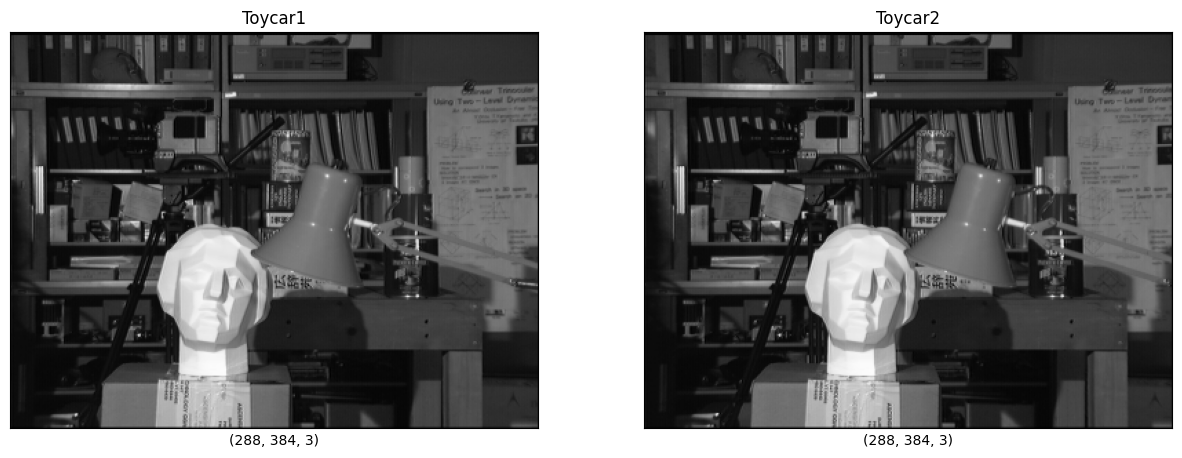

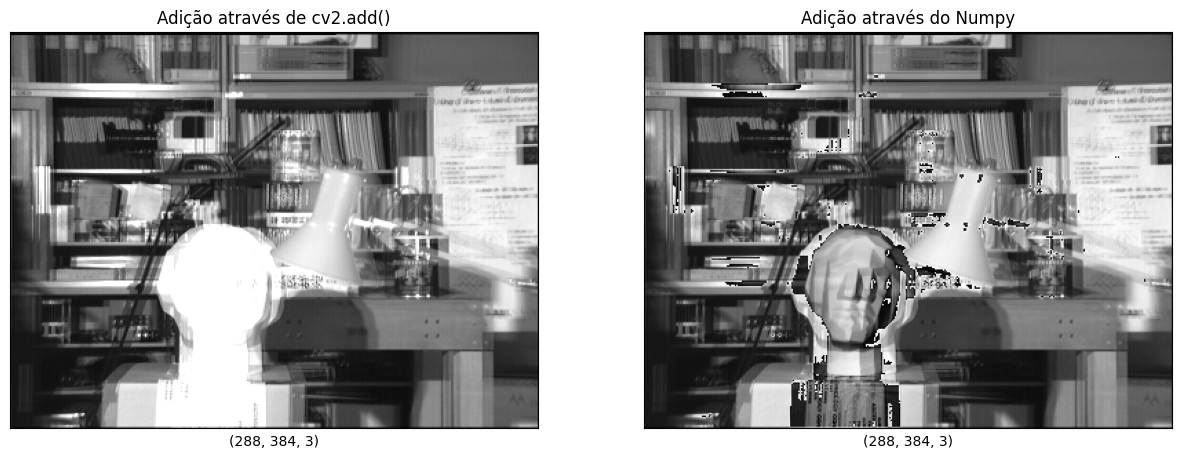

(Text(0.5, 1.0, 'Adição através do Numpy'),
 Text(0.5, 23.999999999999986, '(288, 384, 3)'),
 ([], []),
 ([], []),
 None)

In [23]:
car1 = cv2.imread('/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/tsukuba_r.png')
car2 = cv2.imread('/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/tsukuba_l.png')
img1 = cv2.add(car1,car2) # Soma OpenCV
img2 = car1 + car2        # Soma Numpy

# Subplots
plt.figure(figsize = (15,15))
plt.subplot(221) #Fotografia
plt.imshow(cv2.cvtColor(car1, cv2.COLOR_BGR2RGB)) #utilizado o matplotlib ao invés do CV2
plt.title("Toycar1"),plt.xlabel(car1.shape),plt.xticks([]),plt.yticks([])
plt.subplot(222) #Objeto
plt.imshow(cv2.cvtColor(car2, cv2.COLOR_BGR2RGB))
plt.title("Toycar2"),plt.xlabel(car2.shape),plt.xticks([]),plt.yticks([]),plt.show()
plt.figure(figsize = (15,15))
plt.subplot(223) #Fotografia
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) #utilizado o matplotlib ao invés do CV2
plt.title("Adição através de cv2.add()"),plt.xlabel(img1.shape),plt.xticks([]),plt.yticks([]),
plt.subplot(224) #Objeto
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Adição através do Numpy"),plt.xlabel(img2.shape),plt.xticks([]),plt.yticks([]),plt.show()


# o código está pronto. Faça com outras imagens e tire suas conclusões!

# **ESCREVA AQUI SUA CONCLUSÃO SOBRE O EXERCÍCIO 2:**

Neste exercício, utilizei a soma de duas imagens usando duas formas diferentes: cv2.add() e a soma direta com Numpy (+). Aqui estão as diferenças:

Usando cv2.add():

A função soma os pixels das duas imagens e garante que o valor final nunca ultrapasse 255 (o máximo de brilho em imagens de 8 bits).
Isso ajuda a evitar problemas como cores muito brilhantes ou estranhas, mantendo a imagem mais natural.
Usando Numpy (+):

A soma direta não faz essa checagem. Se a soma de dois pixels ultrapassar 255, o valor "dá a volta" e começa de 0 novamente.
Isso pode resultar em uma imagem com cores distorcidas ou efeitos visuais estranhos.

# **3)**
Elabore um código para executar as operações lógicas e reproduzir as imagens com diferentes tipos de "Limiarização”.
Imagens: rice.png, peppers.png.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensões de rice: (256, 256)
Dimensões de peppers: (384, 512)


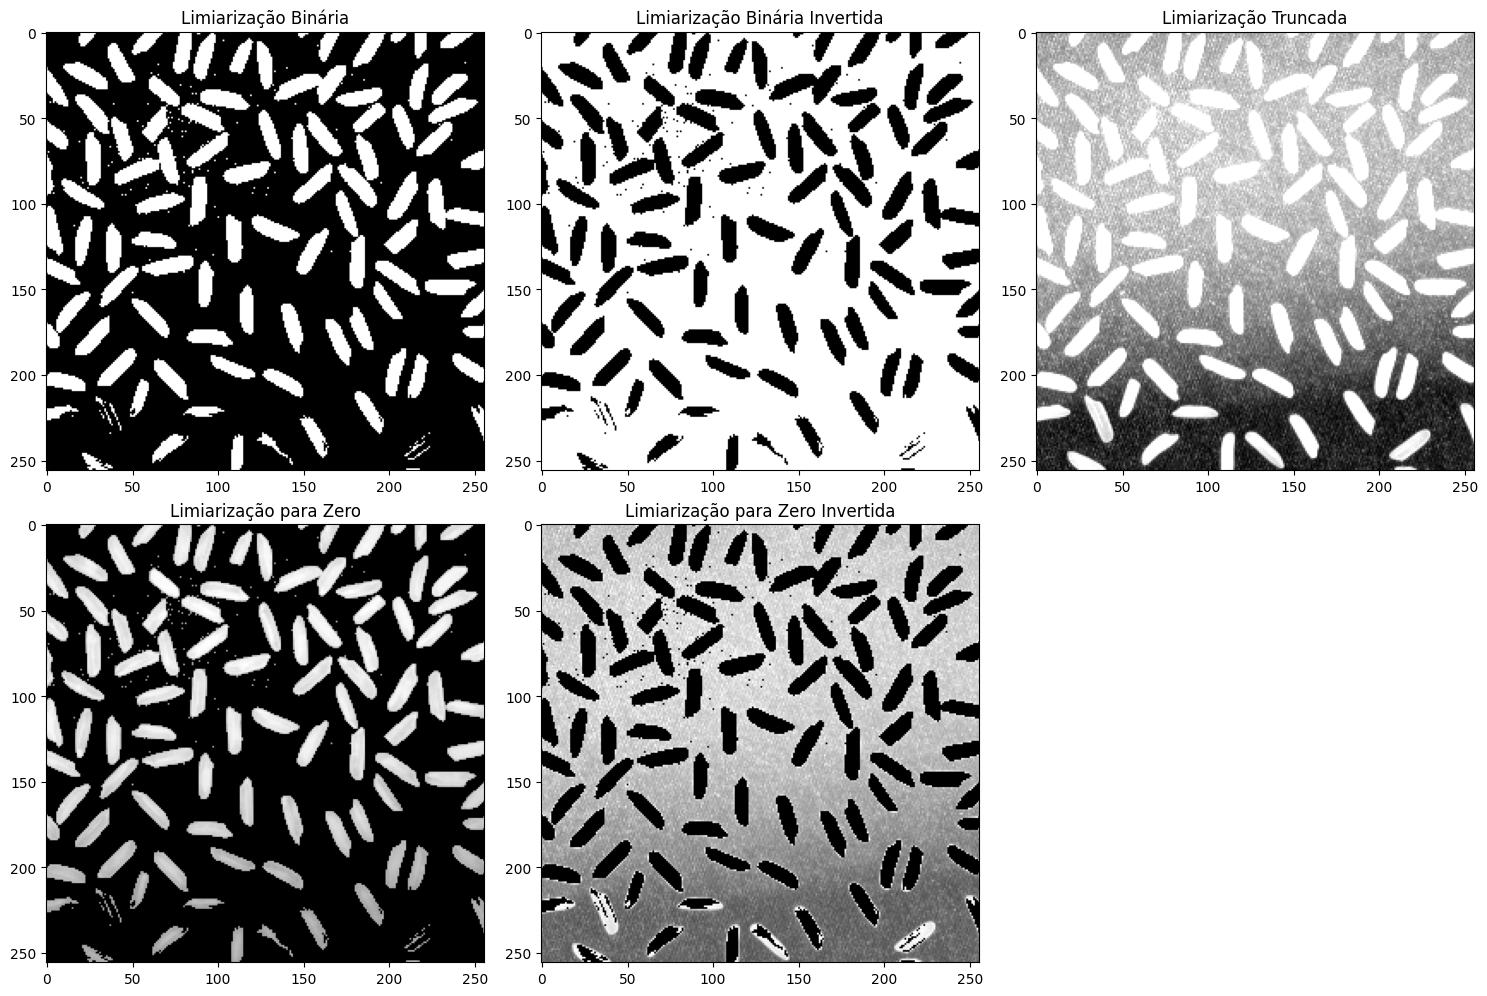

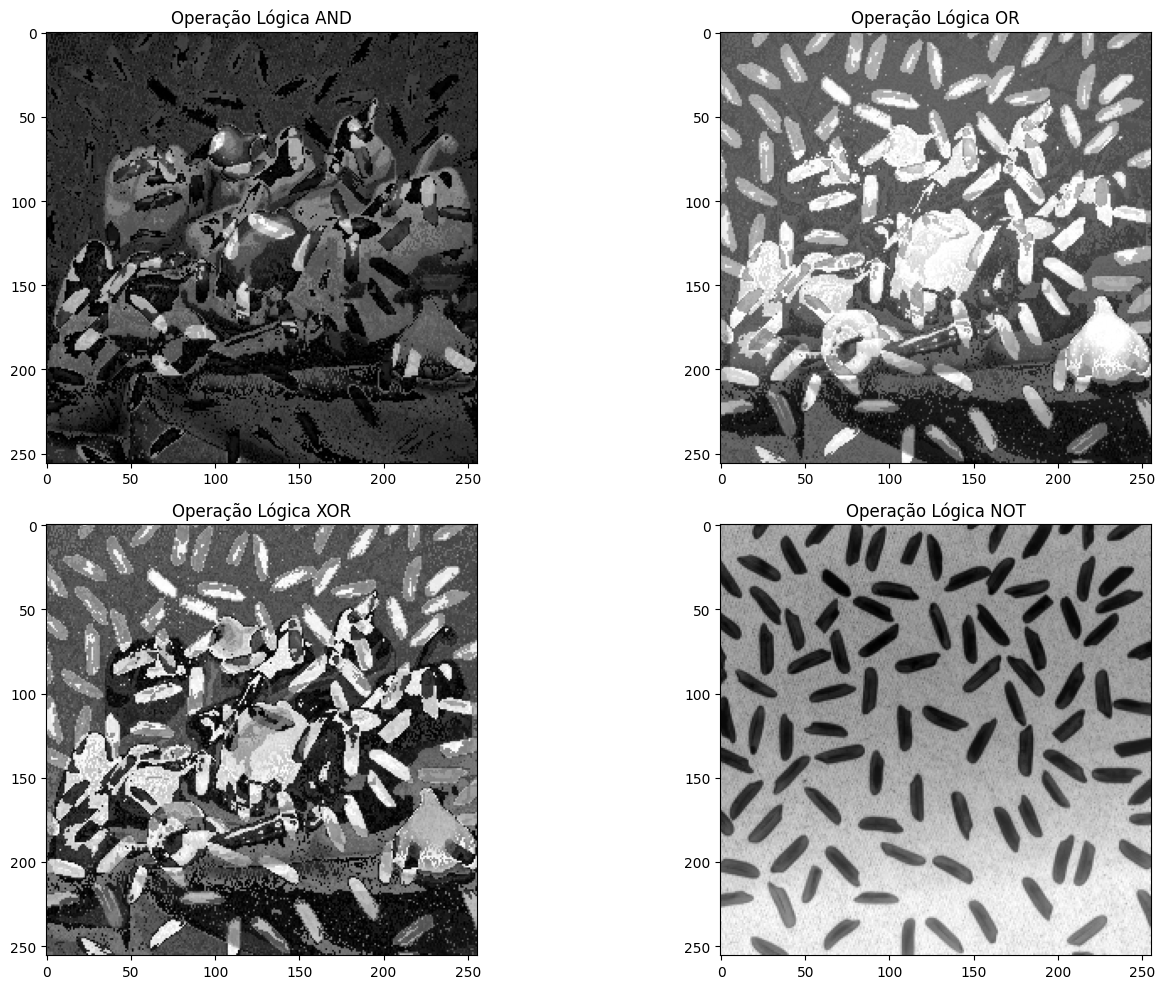

In [25]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Montar o Google Drive para acessar as imagens
from google.colab import drive
drive.mount('/content/drive')

# Caminho das imagens
path = '/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/'
rice = cv2.imread(path + 'rice.png', cv2.IMREAD_GRAYSCALE)
peppers = cv2.imread(path + 'peppers.png', cv2.IMREAD_GRAYSCALE)

# Verificando se as imagens foram carregadas corretamente
if rice is None or peppers is None:
    print("Erro ao carregar uma ou ambas as imagens. Verifique os caminhos.")
else:
    # Exibindo as dimensões das imagens
    print("Dimensões de rice:", rice.shape)
    print("Dimensões de peppers:", peppers.shape)

    # Redimensionando a imagem "peppers" para o tamanho de "rice"
    peppers_resized = cv2.resize(peppers, (rice.shape[1], rice.shape[0]))

    # Aplicando diferentes tipos de limiarização
    _, binary = cv2.threshold(rice, 127, 255, cv2.THRESH_BINARY)
    _, binary_inv = cv2.threshold(rice, 127, 255, cv2.THRESH_BINARY_INV)
    _, trunc = cv2.threshold(rice, 127, 255, cv2.THRESH_TRUNC)
    _, tozero = cv2.threshold(rice, 127, 255, cv2.THRESH_TOZERO)
    _, tozero_inv = cv2.threshold(rice, 127, 255, cv2.THRESH_TOZERO_INV)

    # Exibindo os resultados da limiarização
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1), plt.imshow(binary, cmap='gray'), plt.title("Limiarização Binária")
    plt.subplot(2, 3, 2), plt.imshow(binary_inv, cmap='gray'), plt.title("Limiarização Binária Invertida")
    plt.subplot(2, 3, 3), plt.imshow(trunc, cmap='gray'), plt.title("Limiarização Truncada")
    plt.subplot(2, 3, 4), plt.imshow(tozero, cmap='gray'), plt.title("Limiarização para Zero")
    plt.subplot(2, 3, 5), plt.imshow(tozero_inv, cmap='gray'), plt.title("Limiarização para Zero Invertida")
    plt.tight_layout()
    plt.show()

    # Aplicando operações lógicas entre as imagens redimensionadas
    and_image = cv2.bitwise_and(rice, peppers_resized)
    or_image = cv2.bitwise_or(rice, peppers_resized)
    xor_image = cv2.bitwise_xor(rice, peppers_resized)
    not_image = cv2.bitwise_not(rice)

    # Exibindo os resultados das operações lógicas
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1), plt.imshow(and_image, cmap='gray'), plt.title("Operação Lógica AND")
    plt.subplot(2, 2, 2), plt.imshow(or_image, cmap='gray'), plt.title("Operação Lógica OR")
    plt.subplot(2, 2, 3), plt.imshow(xor_image, cmap='gray'), plt.title("Operação Lógica XOR")
    plt.subplot(2, 2, 4), plt.imshow(not_image, cmap='gray'), plt.title("Operação Lógica NOT")
    plt.tight_layout()
    plt.show()


# **4)**
Elabore um código para reproduzir as imagens e o histograma.
Imagens: coins.png, rice.png.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


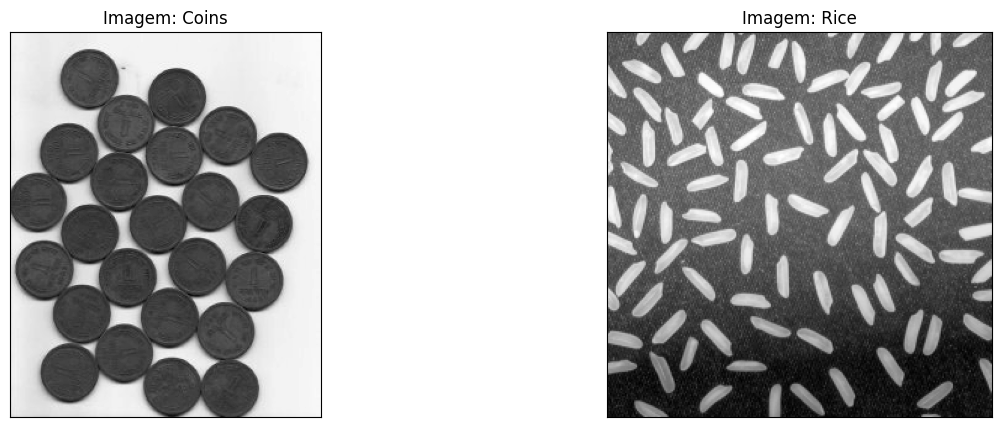

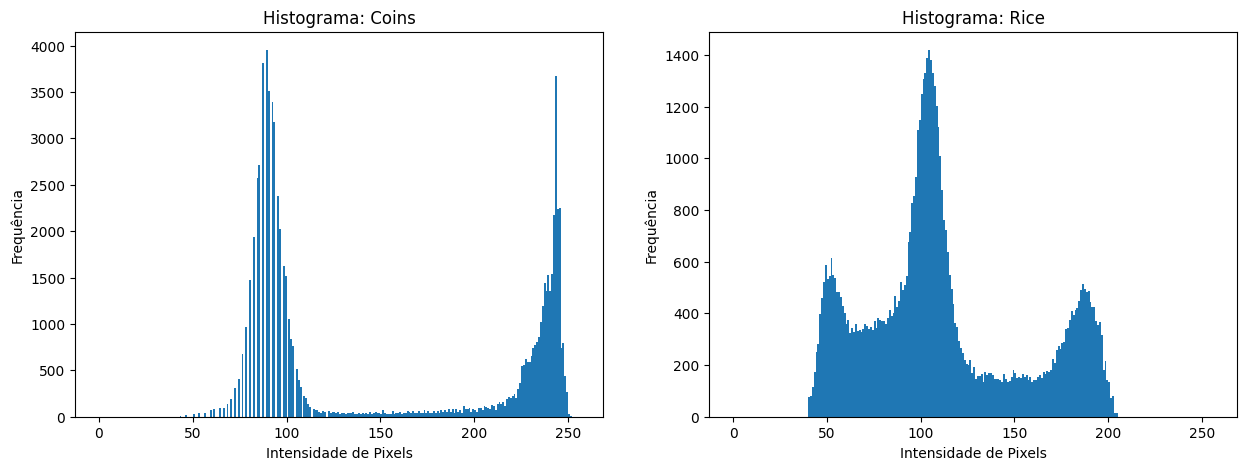

In [26]:
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive para acessar as imagens
drive.mount('/content/drive')

# Caminho das imagens
path = '/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/'
coins = cv2.imread(path + 'coins.png', cv2.IMREAD_GRAYSCALE)
rice = cv2.imread(path + 'rice.png', cv2.IMREAD_GRAYSCALE)

# Verificar se as imagens foram carregadas corretamente
if coins is None or rice is None:
    print("Erro ao carregar uma ou ambas as imagens. Verifique os caminhos.")
else:
    # Exibir as imagens
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(coins, cmap='gray')
    plt.title("Imagem: Coins"), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(rice, cmap='gray')
    plt.title("Imagem: Rice"), plt.xticks([]), plt.yticks([])

    plt.show()

    # Gerar e exibir histogramas
    plt.figure(figsize=(15, 5))

    # Histograma da imagem 'coins'
    plt.subplot(1, 2, 1)
    plt.hist(coins.ravel(), bins=256, range=(0, 256))
    plt.title("Histograma: Coins")
    plt.xlabel("Intensidade de Pixels")
    plt.ylabel("Frequência")

    # Histograma da imagem 'rice'
    plt.subplot(1, 2, 2)
    plt.hist(rice.ravel(), bins=256, range=(0, 256))
    plt.title("Histograma: Rice")
    plt.xlabel("Intensidade de Pixels")
    plt.ylabel("Frequência")

    plt.show()


# **5)**
Elabore um programa para calcular o histograma de uma imagem colorida. Deverá ser apresentado um histograma para cada canal (R-G-B). Uma equalização deverá ser feita para cada canal separadamente. Os canais equalizados deverão ser re-agrupados e a imagem colorida composta deverá ser apresentada.
Imagem da aula: peppers.png

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


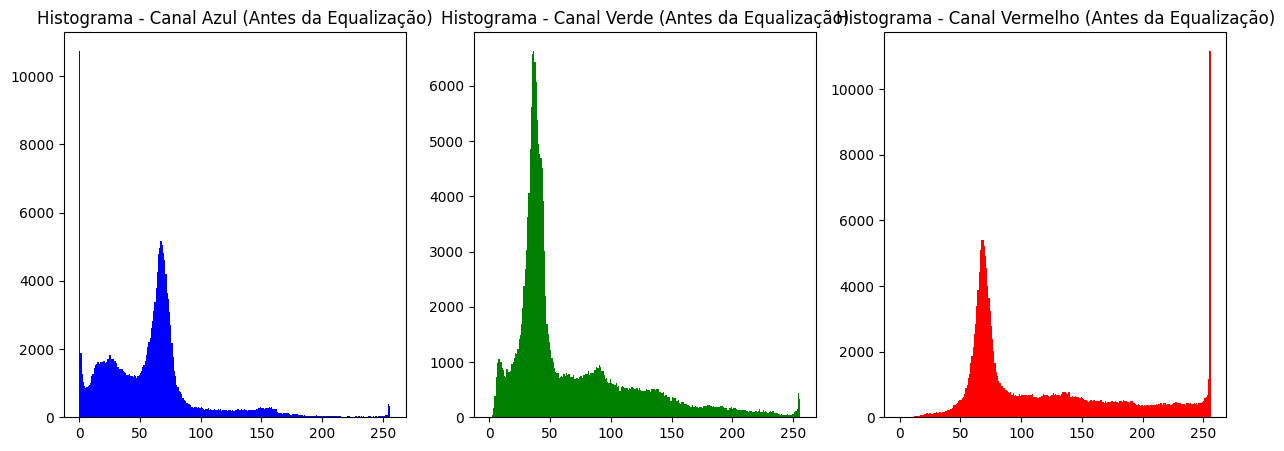

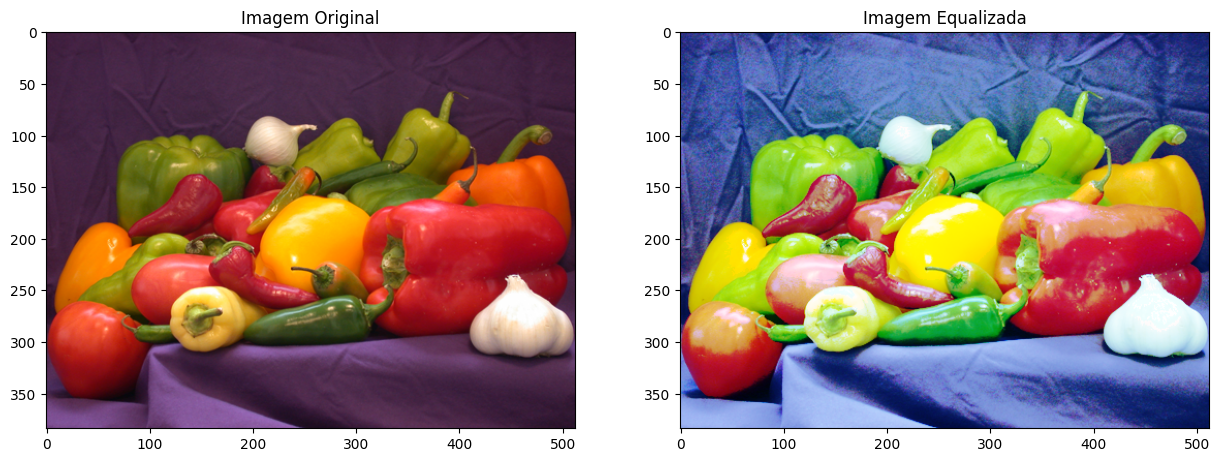

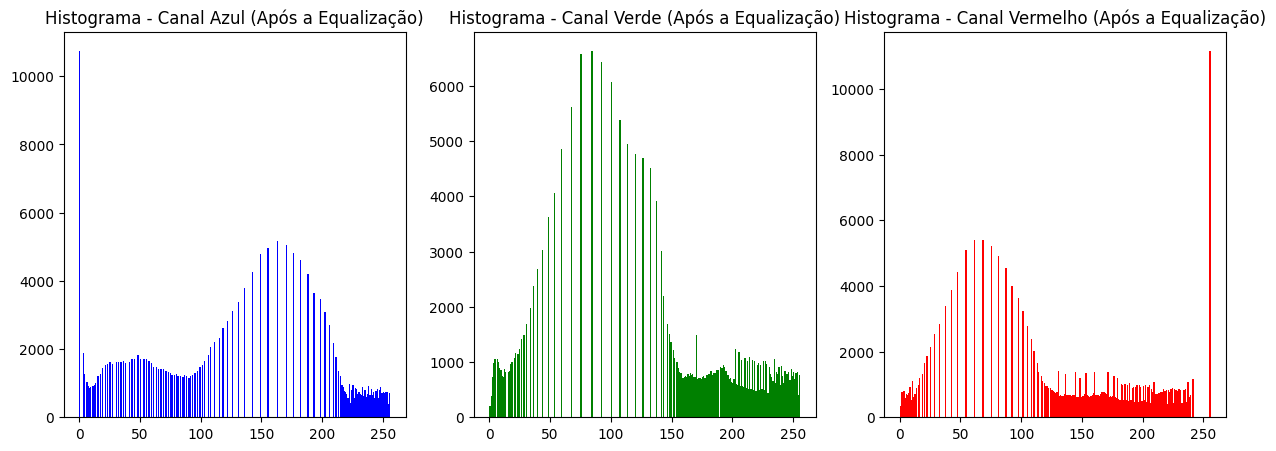

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive para acessar as imagens
drive.mount('/content/drive')

# Caminho da imagem
path = '/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/'
image = cv2.imread(path + 'peppers.png')

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem. Verifique o caminho.")
else:
    # Separando os canais de cor (B, G, R)
    blue_channel, green_channel, red_channel = cv2.split(image)

    # Exibindo o histograma para cada canal antes da equalização
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(blue_channel.ravel(), bins=256, range=(0, 256), color='blue')
    plt.title("Histograma - Canal Azul (Antes da Equalização)")

    plt.subplot(1, 3, 2)
    plt.hist(green_channel.ravel(), bins=256, range=(0, 256), color='green')
    plt.title("Histograma - Canal Verde (Antes da Equalização)")

    plt.subplot(1, 3, 3)
    plt.hist(red_channel.ravel(), bins=256, range=(0, 256), color='red')
    plt.title("Histograma - Canal Vermelho (Antes da Equalização)")

    plt.show()

    # Equalizando cada canal separadamente
    equalized_blue = cv2.equalizeHist(blue_channel)
    equalized_green = cv2.equalizeHist(green_channel)
    equalized_red = cv2.equalizeHist(red_channel)

    # Reunindo os canais equalizados em uma nova imagem
    equalized_image = cv2.merge((equalized_blue, equalized_green, equalized_red))

    # Exibindo a imagem original e a imagem equalizada
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagem Original")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
    plt.title("Imagem Equalizada")

    plt.show()

    # Exibindo o histograma para cada canal após a equalização
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(equalized_blue.ravel(), bins=256, range=(0, 256), color='blue')
    plt.title("Histograma - Canal Azul (Após a Equalização)")

    plt.subplot(1, 3, 2)
    plt.hist(equalized_green.ravel(), bins=256, range=(0, 256), color='green')
    plt.title("Histograma - Canal Verde (Após a Equalização)")

    plt.subplot(1, 3, 3)
    plt.hist(equalized_red.ravel(), bins=256, range=(0, 256), color='red')
    plt.title("Histograma - Canal Vermelho (Após a Equalização)")

    plt.show()


# **6)**
Escolha uma das imagens, que tenha característica bimodal (analise os histogramas). Elabore um código para realizar a binarização de Otsu, tanto no formato em escala de cinzas quanto na imagem colorida.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


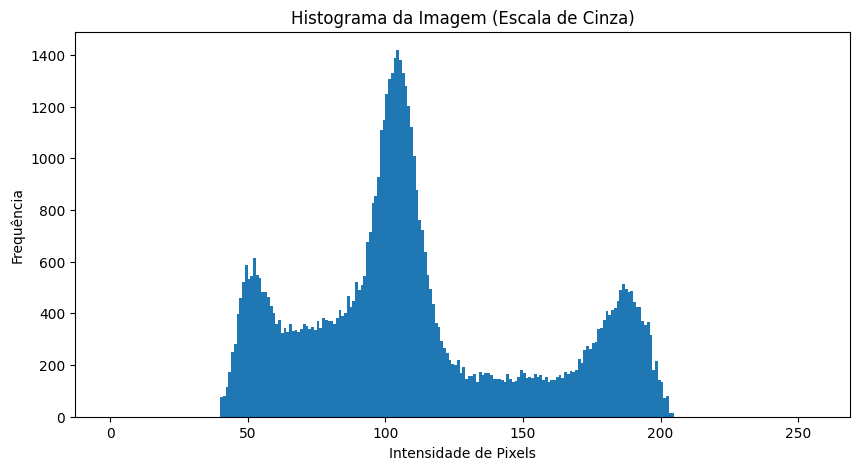

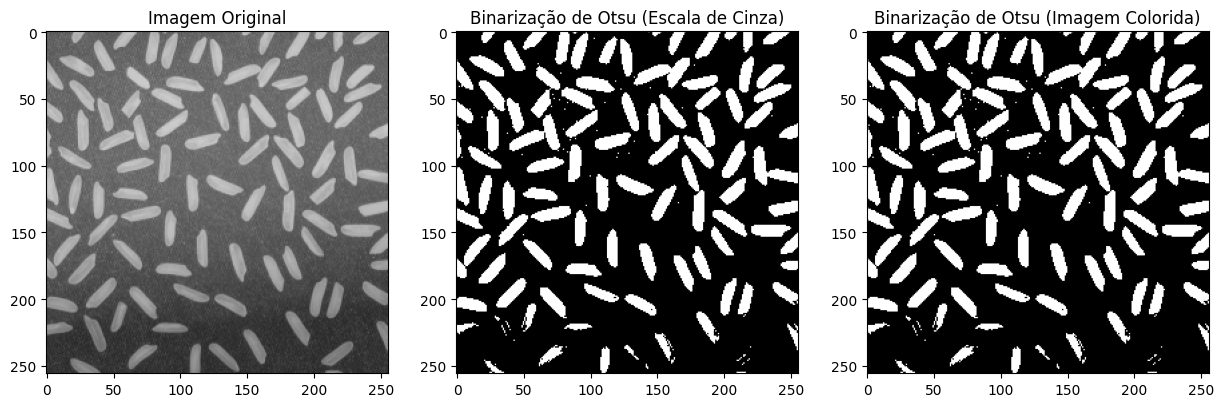

In [30]:
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive para acessar as imagens
drive.mount('/content/drive')

# Caminho da imagem
path = '/content/drive/MyDrive/FACULDADE/8º SEM/Computação Gráfica/P2-COMPUTACAO-GRAFICA/Colab/'
image = cv2.imread(path + 'rice.png')

# Verificar se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem. Verifique o caminho.")
else:
    # Converter a imagem para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular o histograma da imagem em escala de cinza
    plt.figure(figsize=(10, 5))
    plt.hist(gray.ravel(), bins=256, range=(0, 256))
    plt.title("Histograma da Imagem (Escala de Cinza)")
    plt.xlabel("Intensidade de Pixels")
    plt.ylabel("Frequência")
    plt.show()

    # Aplicar a binarização de Otsu na imagem em escala de cinza
    _, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Aplicar a binarização de Otsu em cada canal da imagem colorida
    channels = cv2.split(image)
    otsu_channels = [cv2.threshold(channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] for channel in channels]

    # Reunir os canais após a binarização
    otsu_color = cv2.merge(otsu_channels)

    # Exibir os resultados
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imagem Original")

    plt.subplot(1, 3, 2)
    plt.imshow(otsu_thresh, cmap='gray')
    plt.title("Binarização de Otsu (Escala de Cinza)")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(otsu_color, cv2.COLOR_BGR2RGB))
    plt.title("Binarização de Otsu (Imagem Colorida)")

    plt.show()
